
### National Australian Bank
- Price Prediction Modle / Linear Regression
- November 2023
- **Ertiza Abbas** / Singapore

In [596]:
# import warnings
# warnings.filterwarnings("ignore")

In [597]:
import math
import pandas as pd 
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from keras.layers import Dropout, Dense, LSTM
import pandas_datareader as pdr
# from keras.models import Sequential
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# import scipy as sc 
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(10,8))
plt.rc('lines', markersize=4)
import tensorflow as tf
import yfinance as yf 
yf.pdr_override()

In [676]:
symbol = 'NAB.AX'  # Replace with your stock symbol
data = yf.Ticker(symbol)
start = dt.datetime(2022,1,1)
# df.reset_index(inplace=True)
# df['Date'] = df['Date'].dt.date
# df.set_index('Date', inplace=True)


In [677]:
data = yf.download(symbol, start)

[*********************100%***********************]  1 of 1 completed


In [678]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,29.209999,29.450001,29.010000,29.400000,27.158276,3822849
2022-01-05,29.500000,29.690001,29.490000,29.610001,27.352264,3526027
2022-01-06,29.570000,29.570000,28.820000,28.969999,26.761063,5813416
2022-01-07,29.440001,29.490000,29.129999,29.420000,27.176750,3245868
2022-01-10,29.270000,29.440001,29.160000,29.389999,27.149038,1940080
...,...,...,...,...,...,...
2023-11-02,28.680000,28.879999,28.530001,28.570000,28.570000,4600910
2023-11-03,28.950001,29.129999,28.780001,29.059999,29.059999,4699140
2023-11-06,29.110001,29.430000,29.040001,29.340000,29.340000,4787783


In [679]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [680]:
data.reset_index(inplace=True)
data['Date'] = data['Date'].dt.date
data.set_index('Date', inplace=True)

In [681]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,29.209999,29.450001,29.010000,29.400000,27.158276,3822849
2022-01-05,29.500000,29.690001,29.490000,29.610001,27.352264,3526027
2022-01-06,29.570000,29.570000,28.820000,28.969999,26.761063,5813416
2022-01-07,29.440001,29.490000,29.129999,29.420000,27.176750,3245868
2022-01-10,29.270000,29.440001,29.160000,29.389999,27.149038,1940080
...,...,...,...,...,...,...
2023-11-02,28.680000,28.879999,28.530001,28.570000,28.570000,4600910
2023-11-03,28.950001,29.129999,28.780001,29.059999,29.059999,4699140
2023-11-06,29.110001,29.430000,29.040001,29.340000,29.340000,4787783


In [682]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 2022-01-04 to 2023-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       468 non-null    float64
 1   High       468 non-null    float64
 2   Low        468 non-null    float64
 3   Close      468 non-null    float64
 4   Adj Close  468 non-null    float64
 5   Volume     468 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 25.6+ KB


In [683]:
# Get descriptive statistics summary of data set 
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,468.000000,468.000000,468.000000,468.000000,468.000000,4.680000e+02
mean,29.403718,29.609850,29.185310,29.409081,28.285760,5.505754e+06
std,1.844010,1.833762,1.828134,1.840681,1.501514,2.925058e+06
min,25.100000,25.325001,25.100000,25.160000,24.506548,1.940080e+06
25%,28.110001,28.280001,27.895000,28.110001,27.139801,3.822862e+06
50%,29.430000,29.590000,29.180000,29.384999,28.487845,4.808571e+06
75%,30.799999,31.005000,30.592500,30.802499,29.376785,6.345295e+06
max,33.540001,33.750000,33.389999,33.599998,31.087421,3.454085e+07


In [684]:
# Display features in data set
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [685]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [686]:
df.head()

,Date,Close
0,2022-01-04,29.400000
1,2022-01-05,29.610001
2,2022-01-06,28.969999
3,2022-01-07,29.420000
4,2022-01-10,29.389999


In [687]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    468 non-null    object 
 1   Close   468 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.4+ KB


In [688]:
# Check for missing values in the columns
df.isna().values.any()

False

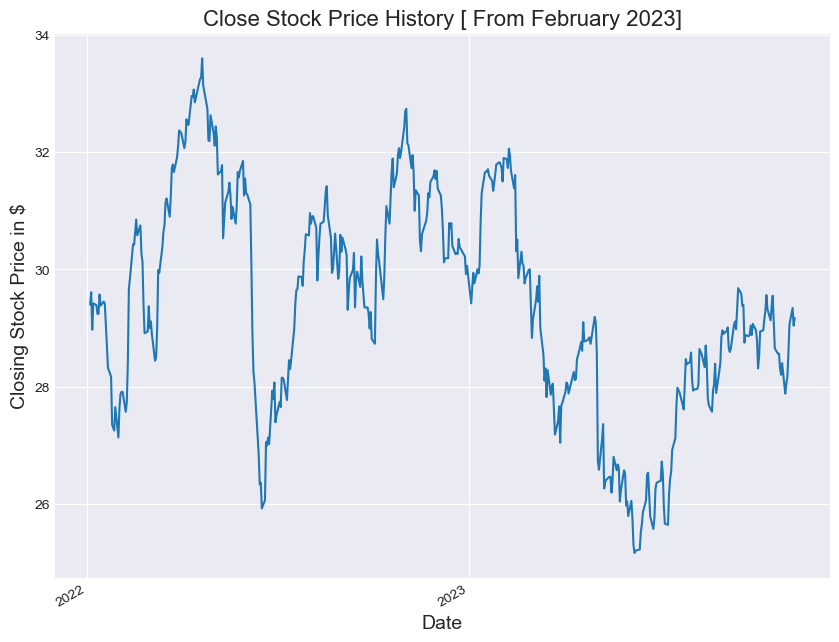

In [689]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [ From February 2023]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Linear Regression
 
Our data contains only one **independent variable ($X$)** which represents the *date* and the **dependent variable ($Y$)** we are trying to predict is the *Stock Price*. To fit a line to the data points, which then represents an estimated relationship between $X$ and $Y$, we can use a **Simple Linear Regression**.

The best fit line can be described with  
$$
Y = \beta_0 + \beta_1 X
$$

where  
* $Y$ is the predicted value of the dependent variable
* $\beta_0$ is the y-intercept
* $\beta_1$ is the slope
* $X$ is the value of the independent variable

The goal is to find such coefficients $\beta_0$ and $\beta_1$ that the **Sum of Squared Errors**, which represents the difference between each point in the dataset with it’s corresponding predicted value outputted by the model, is minimal.

### Training a Linear Regression Model

### Train Test Split

In [690]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [691]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model

In [692]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [693]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [694]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [695]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  -0.0059508053974277235
Intercept:  30.749038174995636


C:\Users\user\.conda\envs\finance_py\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


Interpreting the coefficients:

* The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** Dcreased by 0.08619 $
* The **intercept** coefficient is the price at wich the **closing price** measurement started, the stock price value at date zero

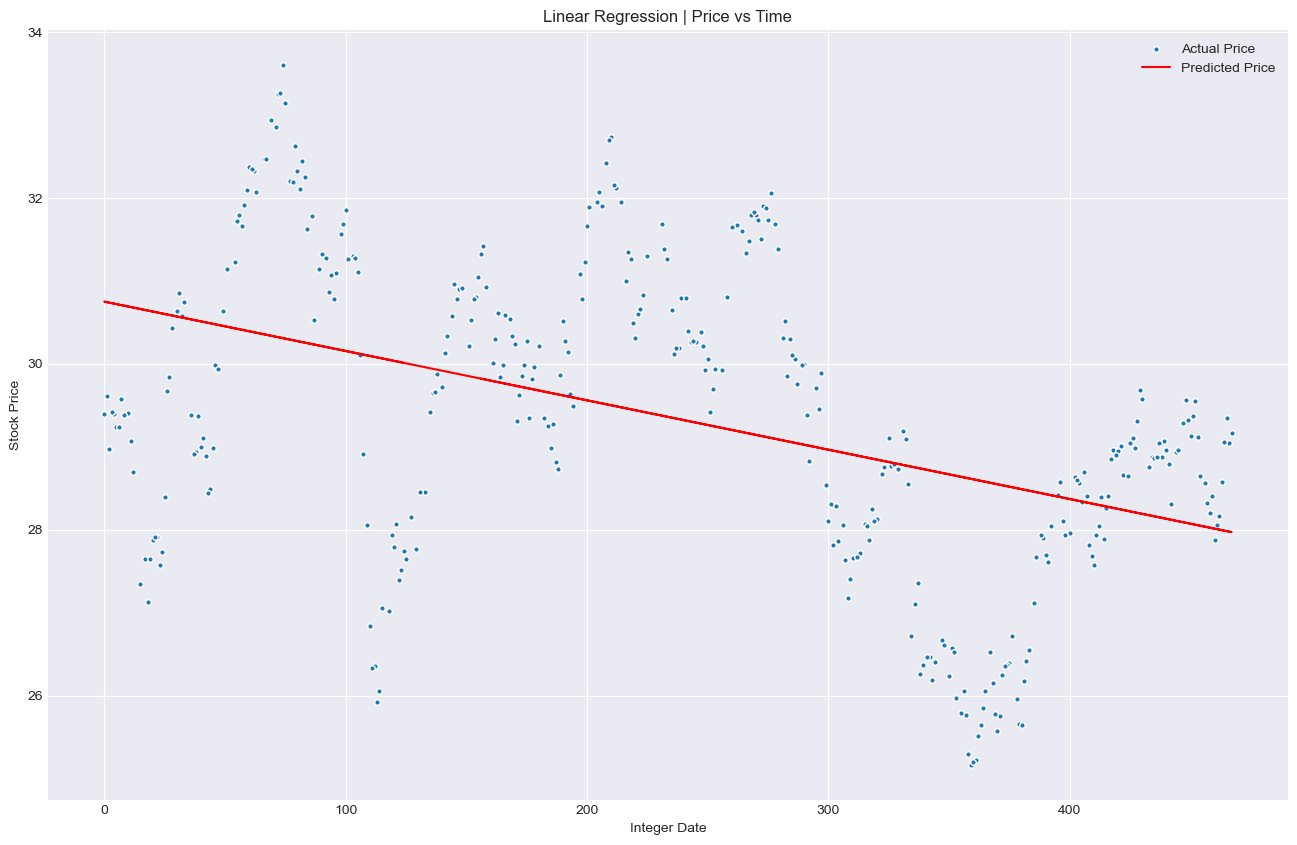

In [696]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Prediction from  Model

In [697]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [698]:
# Generate array with predicted values
y_pred = model.predict(X_test)

## Regression Evaluation


Let us now examine the extent to which the projected values align with the observed values within a randomly selected subset from our dataset.

In [699]:
# Get number of rows in data set for random sample
df.shape

(468, 2)

In [700]:
# Generate 25 random numbers
randints = np.random.randint(150, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [701]:
df_sample.head()

,Date,Close
11,2022-01-19,29.070000
19,2022-02-01,27.639999
22,2022-02-04,27.910000
23,2022-02-07,27.570000
30,2022-02-16,30.639999


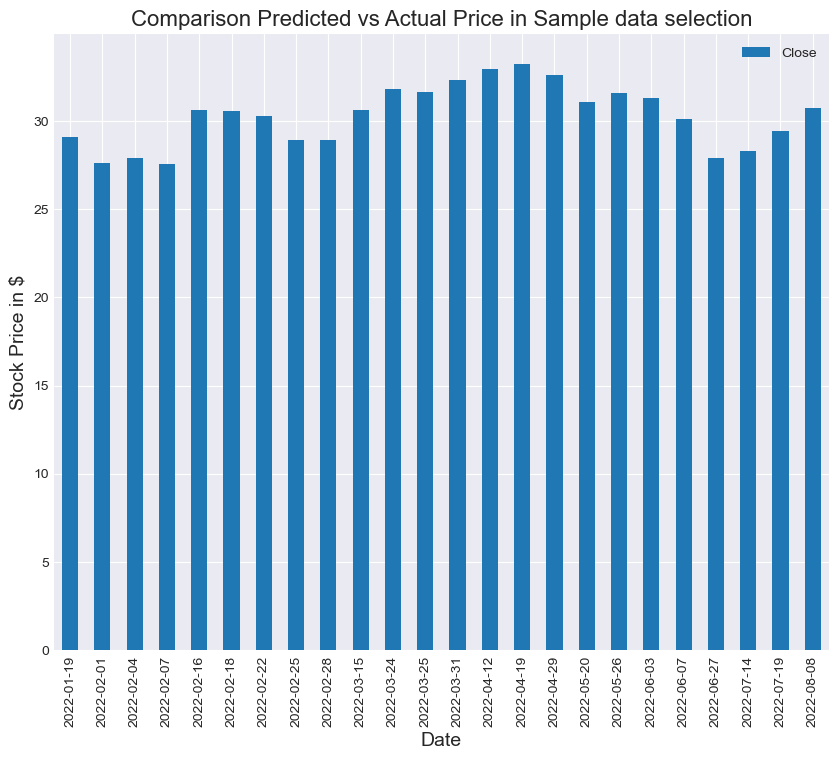

In [702]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()

df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

The disparities between predicted and actual values within the random sample appear to be relatively small. To assess the overall performance of the model.
**let us now examine its performance across the entire test dataset.**

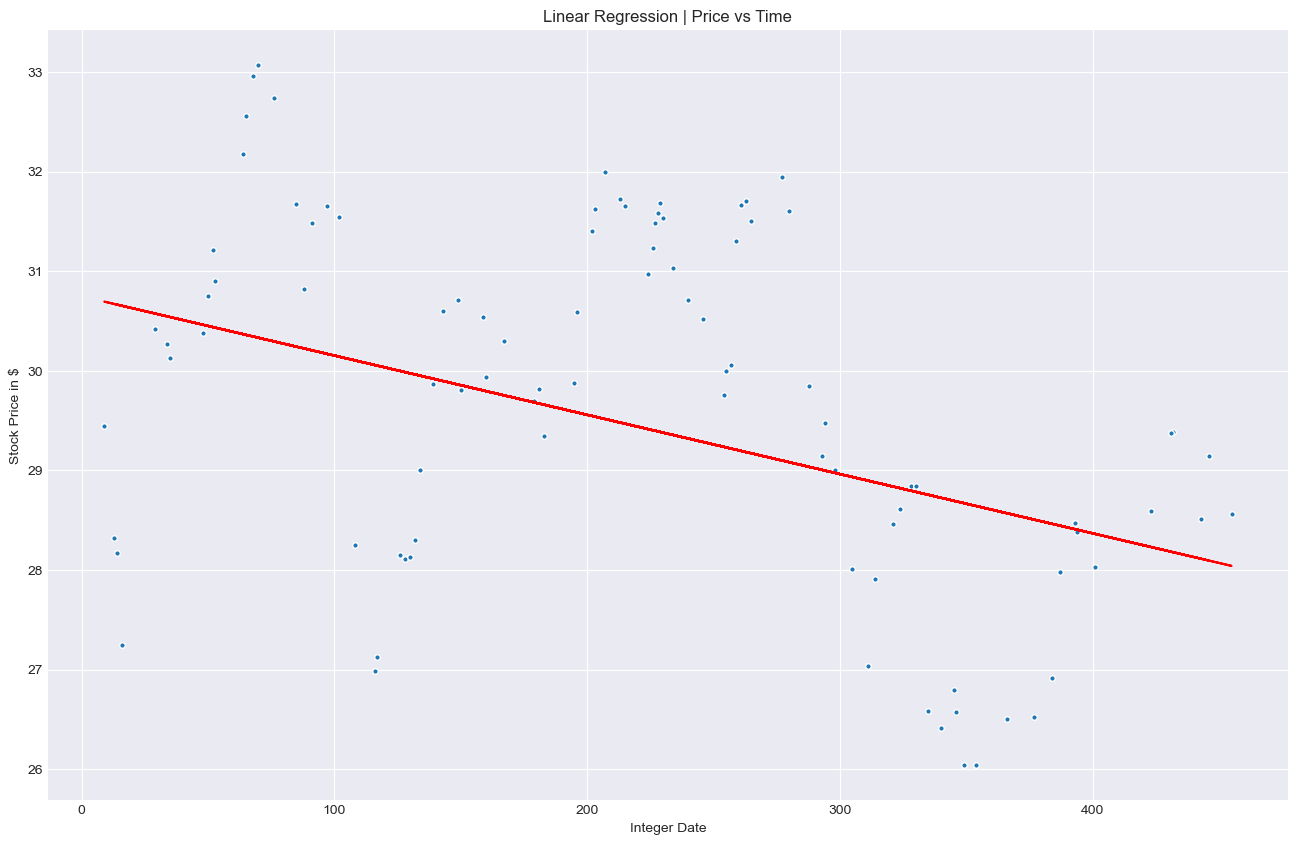

In [703]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

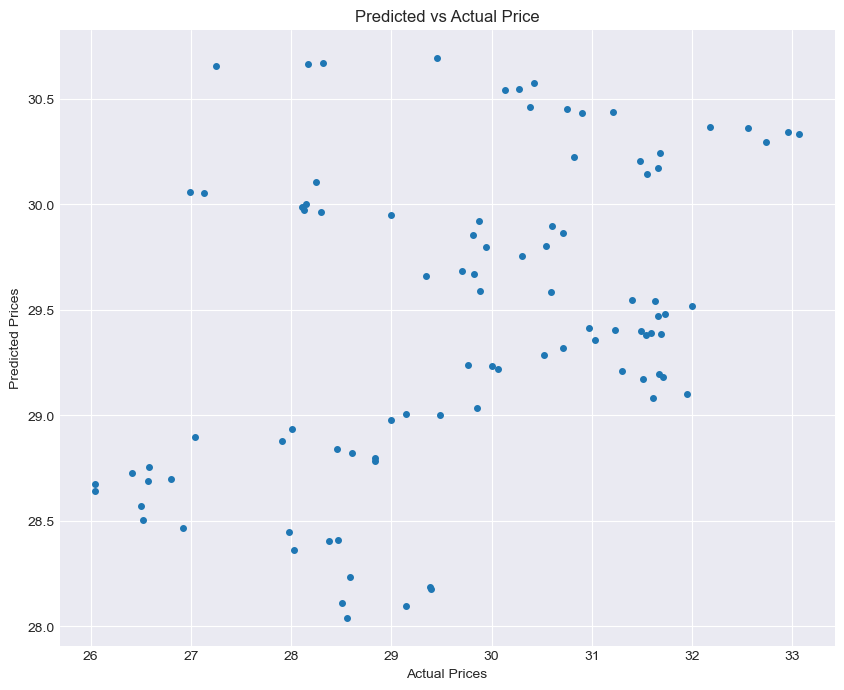

In [704]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

#### Residual Histogram

The residuals are nearly normally distributed around zero, with a slight skewedness to the right. 

C:\Users\user\.conda\envs\finance_py\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


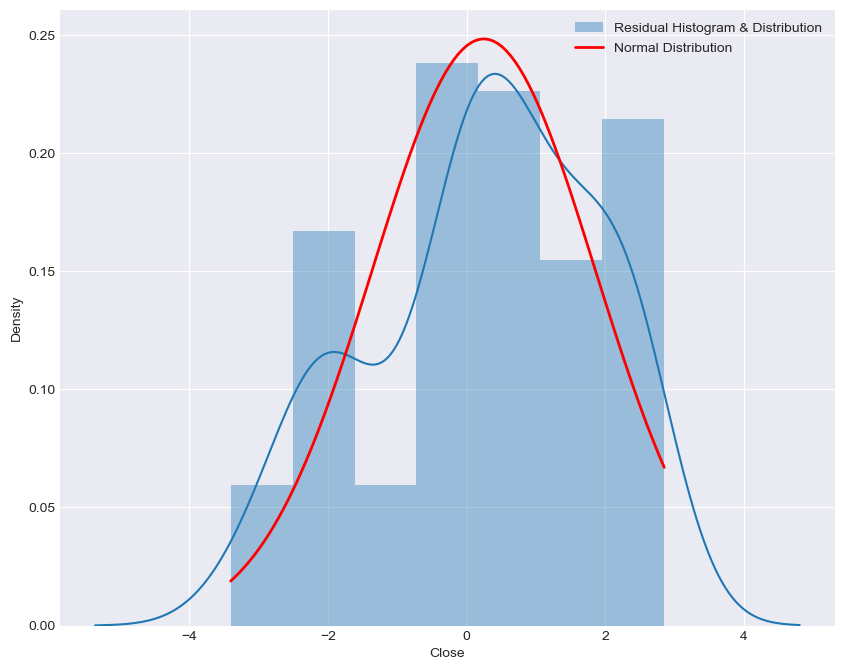

In [705]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [706]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [707]:
df.tail(2)

,Date,Close,Prediction
466,2023-11-07,29.040001,27.975963
467,2023-11-08,29.170000,27.970012


### Error Evaluation Metrics

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
$$
\frac{1}{N} \sum_{i = 1}^{N} |y_i - \hat{y}_i|
$$

**Mean Squared Error (MSE)** is the mean of the squared errors:
$$
\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2
$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
$$
\sqrt{\frac{1}{N} \sum_{i = 1}^{N} (y_i - \hat{y}_i)^2}
$$

All of these are **cost functions** we want to minimize.

# Import metrics package from sklearn for statistical analysis


In [708]:
from sklearn import metrics

In [709]:
# Statistical summary of test data
df['Close'].describe()

count    468.000000
mean      29.409081
std        1.840681
min       25.160000
25%       28.110001
50%       29.384999
75%       30.802499
max       33.599998
Name: Close, dtype: float64

In [710]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3398310049006878
Mean Squared Error: 2.644916285956095
Root Mean Squared Error: 1.6263198596697068


- The Mean Absolute Error (MAE) represents 2.76% of the data's range.
- The Mean Squared Error (MSE) equates to 10.22, reflecting the squared deviations from the actual values.
- The Root Mean Squared Error (RMSE) stands at 3.20, signifying the square root of the MSE, and providing a measure of the model's prediction accuracy.

# Accuracy Evaluation Metrics

To assess the accuracy of our model, we employ the **Coefficient of Determination**, a measure that quantifies the proportion of error explained by our model relative to the total error. It ranges between 0 and 1, with a value of 1 indicating that 100% of the error is accounted for by the model.

**Coefficient of Determination**
$$
R^2 = 1 - \frac{RSS}{TSS}
$$

where

**Residual Sum of Squares (RSS)**
$$
RSS = \sum_{i=1}^{N} \epsilon_i^2 = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

and

**Total Sum of Squares (TSS)**
$$
TSS = \sum_{i=1}^{N} (y_i - \bar{y}_i)^2
$$


In [711]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.162966834826495


In [712]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.18223143377492812

The value of $R^2$ indicates that our model accounts for approximately 16.2% of the variances between the observed stock prices and the predicted prices, demonstrating a moderate level of explanatory power.


#### Conclusion - Remarks
Viewed from the vantage point of a data analyst, the application of the machine learning process for forecasting NAB.AX prices through linear regression has given rise to a model with notable predictive capabilities. The R² value, approximately 0.162, indicates that the model can elucidate a modest portion of the variances between observed and predicted stock prices. While the model's explanatory power falls short of ideal, it nonetheless serves as a valuable instrument for informed financial forecasts, shedding light on market trends, though there remains room for refinement in terms of accuracy and precision.

####  Thank you
- **Ertiza Abbas**
- November 2023